# Part I - Ford GoBike System Data Exploration
## by Akubazgi Gebremariam
## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

%matplotlib inline
# ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [4]:
# importing custom lib 
from  Preprocessing import dataPreprocess
from data_info import DataInfo
from VisualisationPlots import VisualiseDf
#import plotfunction
#import util as u

### Loading the dataset

In [8]:
# loading the data
df_bike = pd.read_csv('../data/201902-fordgobike-tripdata.csv')

In [9]:
df_bike.head()     

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### The structure of the dataset
> the dataset contains 183412 rows observations with 16 columns(varibales)

In [10]:
# initialize info object
bikeInfo = DataInfo(df_bike)

In [11]:
# info
bikeInfo.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [12]:
# shape
bikeInfo.shape_df()

Dataframe contains 183412 rows and 16 columns


In [13]:
# percentage of null in the dataset
bikeInfo.null_percentage()

Dataframe contains null values of 0.59% out of the given dataset


In [14]:
# checking null
bikeInfo.get_count_null()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [15]:
# describe
bikeInfo.describe_stat().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [15]:
# datatypes 
df_bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

## Data cleaning 
- null values issues 
- Datatype issues 

In [16]:
# dropping null values
df_bike.dropna(inplace = True)

In [17]:
# checking after droping null
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [18]:
# Convert time variables from object to datetime
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

### What is/are the main feature(s) of interest in your dataset?
the main interest of the features in the dataset are given below 

> duration_sec, start_time, end_time, start_station_name, end_station_name, bike_id, user_type, member_gender, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that user_type, member_gender and bike_share_for_all_trip will help me to identify the kind of users and bikes mostly used by each individuals.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### what is the distribution of the features?
- In this section the distribution of features which I interested to work are covered

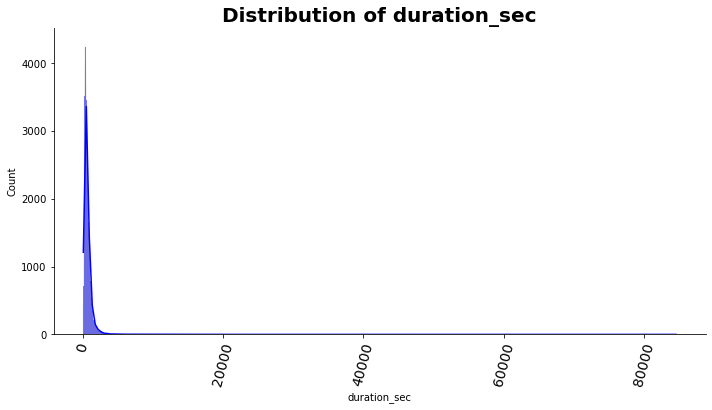

In [19]:
# duration_sec
VisualiseDf.plot_hist(df_bike,'duration_sec','blue')

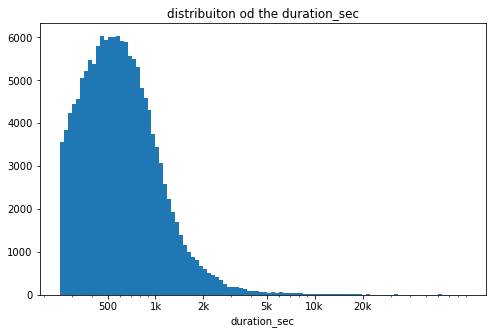

In [20]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration_sec')
plt.title("distribuiton od the duration_sec")
plt.show()

The the distribution of the duration is skewed to wards right which shows the duration from the start station to end station tooks few seconds. Most of the rids took 500 seconds to reach its destination.

In [23]:
# lets group made group by station name
df_bike_station = df_bike.groupby('start_station_name')

In [188]:
# function 
def plot_discriptive_count(df:pd.DataFrame, column: pd.DataFrame)-> None:
    base_color = sb.color_palette()[0]
    type_counts = column.value_counts()
    type_order = type_counts.index
    ax=sb.countplot(data=df, x=column.loc[0:], color=base_color, order=type_order);
    n_user = column.value_counts().sum()

    # get the current tick locations and labels
    locs, labels = plt.xticks(rotation=0) 

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = type_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_user)
        plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)
    #plt.title(f'Distribution', size=20, fontweight='bold')
  # Remove unnecessary features 
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    plt.yticks([])
    # plt.ylabel("t")
    # plt.xlabel('')
    #plt.legend()

    # Show the plot
    plt.show();

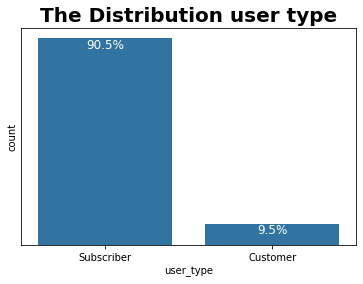

In [22]:
# distribution of user_type
plt.title(f'The Distribution user type', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_bike, df_bike['user_type'])

Insight 
> As we can see the distribution from the above, majority (90.5%) of the user type are subscribers. thus most of the user types are permanent users who agrees to receive emails or notifications to use the bike ford company.


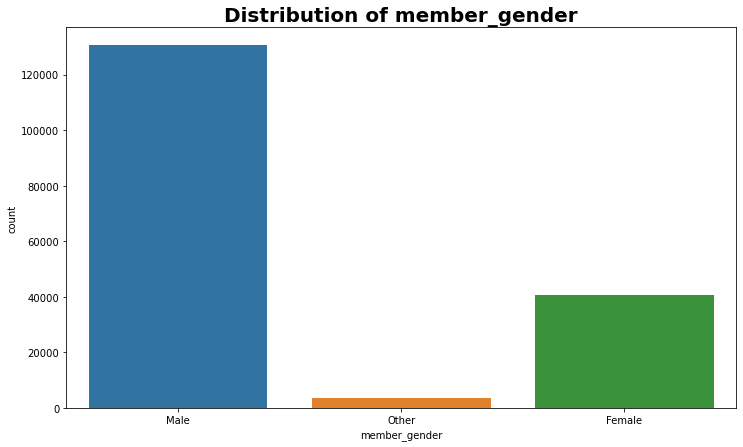

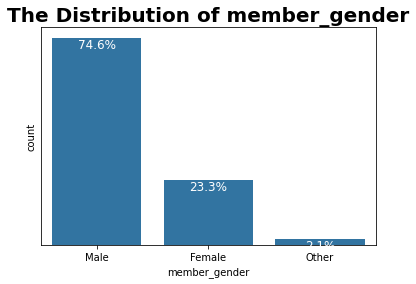

In [25]:
# distribution of member_gender to the ride company 
VisualiseDf.plot_count(df_bike, 'member_gender')
# or 
plt.title(f'The Distribution of member_gender', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_bike,df_bike['member_gender'] )

Insight 
> As the above distribution shows, Males are the most users of 201902-fordgobike-tripdata.

### How is the distribution of bike_share_for_all_trip?

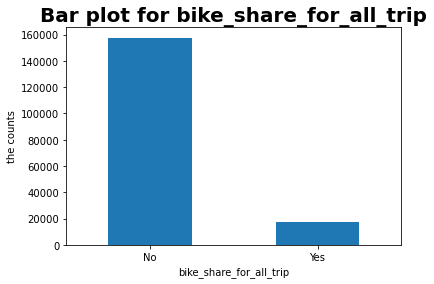

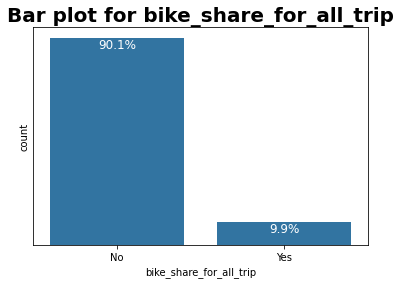

In [27]:
# Bar plot for bike_share_for_all_trip
df_bike['bike_share_for_all_trip'].value_counts().plot(kind = 'bar');
plt.xticks(rotation=0) 
plt.title("Bar plot for bike_share_for_all_trip", size=20, fontweight='bold')
plt.xlabel("bike_share_for_all_trip")
plt.ylabel("the counts")
plt.show()

# or we can use the 
plt.title("Bar plot for bike_share_for_all_trip", size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_bike, df_bike['bike_share_for_all_trip'])

> The above plot shows there are few bikes (9.9%) that can be used for all kind of trips. This indicates, the ford bike company has specifc and separate bikes for specific kind of services.

### Which station is in use by the ford ride mostly?
- The value counts method will be used to identify some of the popular stations 

In [74]:
# bar plot catagorical variables start_station_name  and end_station_nameof top 8 places
df_bike['start_station_name'].value_counts().head(8)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Name: start_station_name, dtype: int64

In [75]:
df_bike['end_station_name'].value_counts().head(8)           

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Name: end_station_name, dtype: int64

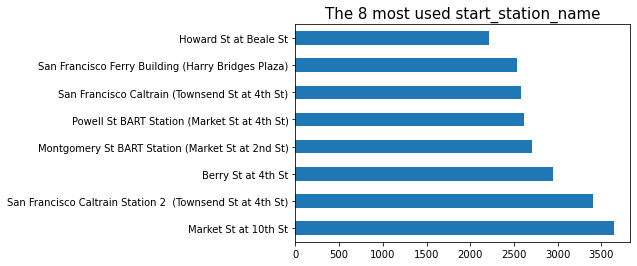

In [99]:
# using bar chart for the start station name
plt.title(f'The 8 most used start_station_name', fontsize=15)
df_bike.start_station_name.value_counts(ascending = False).head(8).plot(kind ='barh');

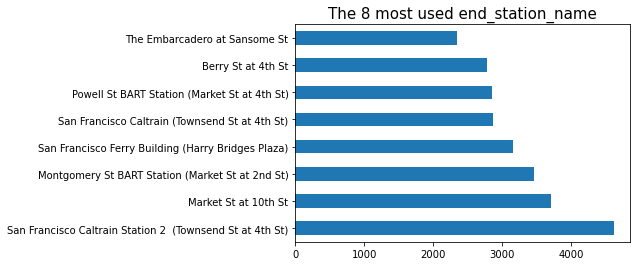

In [12]:
# using bar chart for the end station name
plt.title(f'The 8 most used end_station_name', fontsize=15)
df_bike.end_station_name.value_counts(ascending = False).head(8).plot(kind ='barh');

In [7]:
df_bike =pd.read_csv("../data/2019_clean.csv")

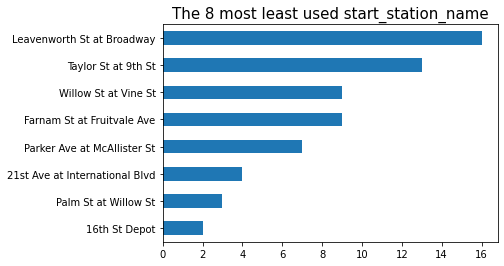

In [14]:
# list 8 start station name 
plt.title(f'The 8 most least used start_station_name', fontsize=15)
df_bike.start_station_name.value_counts(ascending = True).head(8).plot(kind ='barh');

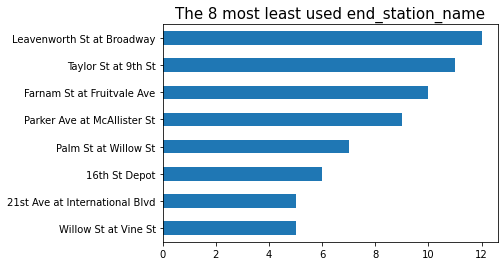

In [16]:
# list 8 end station name 
plt.title(f'The 8 most least used end_station_name', fontsize=15)
df_bike.end_station_name.value_counts(ascending = True).head(8).plot(kind ='barh');

> From the above plots the first 2 graph shows the start and end station name that widely used
> - Market St at 10th St is the most widely used start station name
> - San Francisco Caltrain Station 2 (Townsend St at 4th St) is the most widely end start station name
> - So, it can be easily understood which stations are mostly in use by the Ford GoBike company 

> From the above plots the last 2 graph shows the start and end station name which is least used
> - 16th St Depot is least used star station name
> - Willow St at vine St is least used end station name 

### What is the distribution of user birth_year in each user type

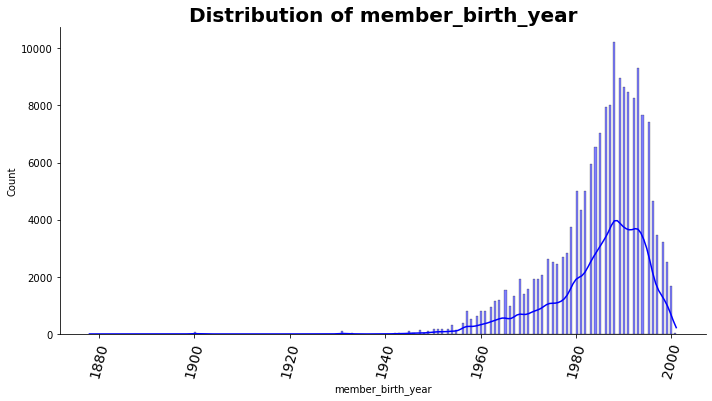

In [96]:
# lets look the distribution of birth_year
VisualiseDf.plot_hist(df_bike, 'member_birth_year', color ="blue")

In [131]:
user_birth = df_bike['member_birth_year'].groupby(df_bike['user_type']).sum()
user_birth

user_type
Customer       32889331.0
Subscriber    314355947.0
Name: member_birth_year, dtype: float64

> Most of the users who are born in between 1980 and 2000, around 314355947.0 are Subscriber and 32889331.0 are Customers to the company.

### Datetime analysis
- In this analysis, feature engineering or adding new columns would be done first 

In [101]:
# feature engineering 
# adding month
df_bike['month'] = df_bike['start_time'].dt.month_name()
# adding start day
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
# adding hour
df_bike['hour'] = df_bike['start_time'].dt.hour
# adding date
df_bike['date'] = df_bike['start_time'].dt.date

In [105]:
df_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'month', 'start_day', 'hour', 'date'],
      dtype='object')

**Waht is the distibution regarding to the daily usage services in the Ford GoBike ride company?**

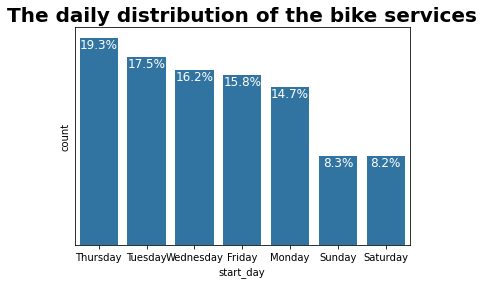

In [109]:
# daily distribution analysis
plt.title("The daily distribution of the bike services", size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_bike, df_bike['start_day'])

> The bike service is more widely used on weekdays than weekends. Because the majority of users are subscribers who are actively in use on weekdays. Thursday is the most working day of the weekdays.  

**Which month does worked most?**

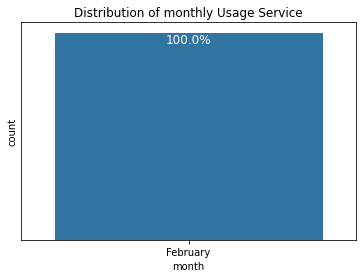

In [112]:
# Monthly distribution 
plt.title('Distribution of monthly Usage Service')
VisualiseDf.plot_discriptive_count(df_bike, df_bike['month'])

In [113]:
df_bike['start_time'].value_counts()

2019-02-11 17:05:07.840    2
2019-02-19 17:52:44.175    2
2019-02-01 18:24:34.874    2
2019-02-07 09:06:07.056    2
2019-02-06 21:35:57.574    2
                          ..
2019-02-20 18:00:11.142    1
2019-02-20 18:04:53.774    1
2019-02-20 17:59:00.155    1
2019-02-20 18:03:10.562    1
2019-02-01 00:00:20.636    1
Name: start_time, Length: 174941, dtype: int64

> The dataset is colloected for february only so that, it does not showing other month results

**Hourly distribution of bike working on the days**

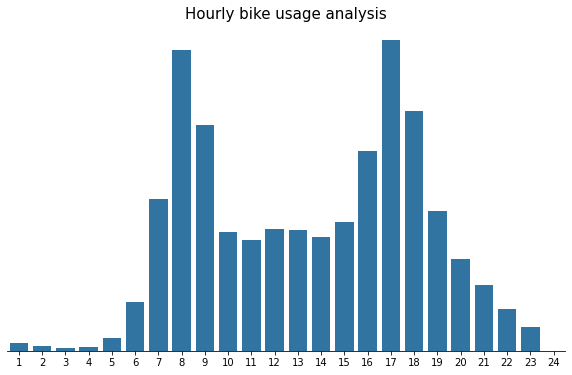

In [8]:
def hour_bar():
    #hour_order = df_bike['hour'].value_counts().index
    hour = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    base_color = sb.color_palette()[0]
    plt.figure(figsize=(10,6))
    plt.title('Hourly bike usage analysis', fontsize=15)
    ax = sb.countplot(data=df_bike, x='hour', order=hour, color=base_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.yticks([])
    plt.ylabel('')
    plt.xlabel('');
hour_bar()

> As we can see the plot, the most used time in the 24 hour is 17. this is because by this time most of the users are moving to home from works places or offices. 
> the second most used time is 8 And this is important to know which time are busey and idel to prevent from unneccessary wastage of time.

In [6]:
df_bike = pd.read_csv('../Data/2019_clean.csv')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, I will try to investiget the relationship between the following varibles, duration_sec, start_time, end_time, 
       start_station_name, end_station_name,end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip.

In [147]:
#  classification into numerical and catogorical
df_bik_numeric =df_bike[['duration_sec', 'bike_id', 'member_birth_year','start_station_id','end_station_id']]
df_bik_cat =df_bike[['start_station_name', 'end_station_name', 'user_type','member_gender', 'bike_share_for_all_trip']]

## what is the relationship between the selected numarical variables and catagorical variables

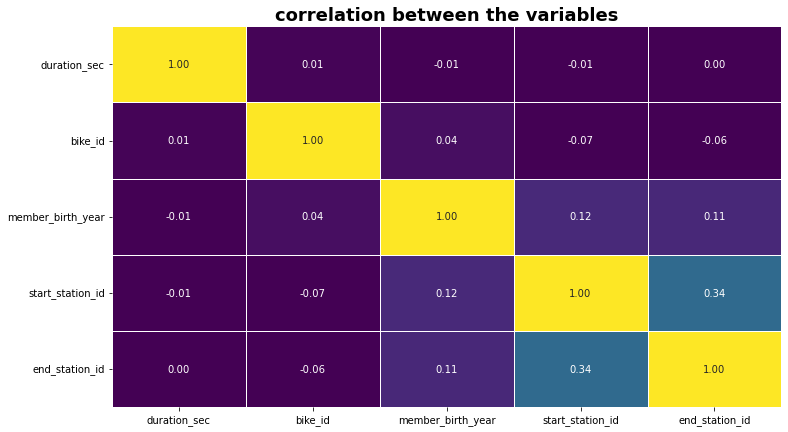

In [149]:
# correlation between the numerical varibales 
corelation = df_bik_numeric.corr()
VisualiseDf.plot_heatmap(corelation, "correlation between the variables")

Insight 
> As it is observed from the above heatmap,  the numerical variables are having less relationship among them. some of them are showing negative correlation which means when the variable increase or decrease the other varible goes to the opposit direction. some of them are showing zero relationship between them.

df_bike.shape= (174952, 16)
df_bike_sample.shape= (500, 16)


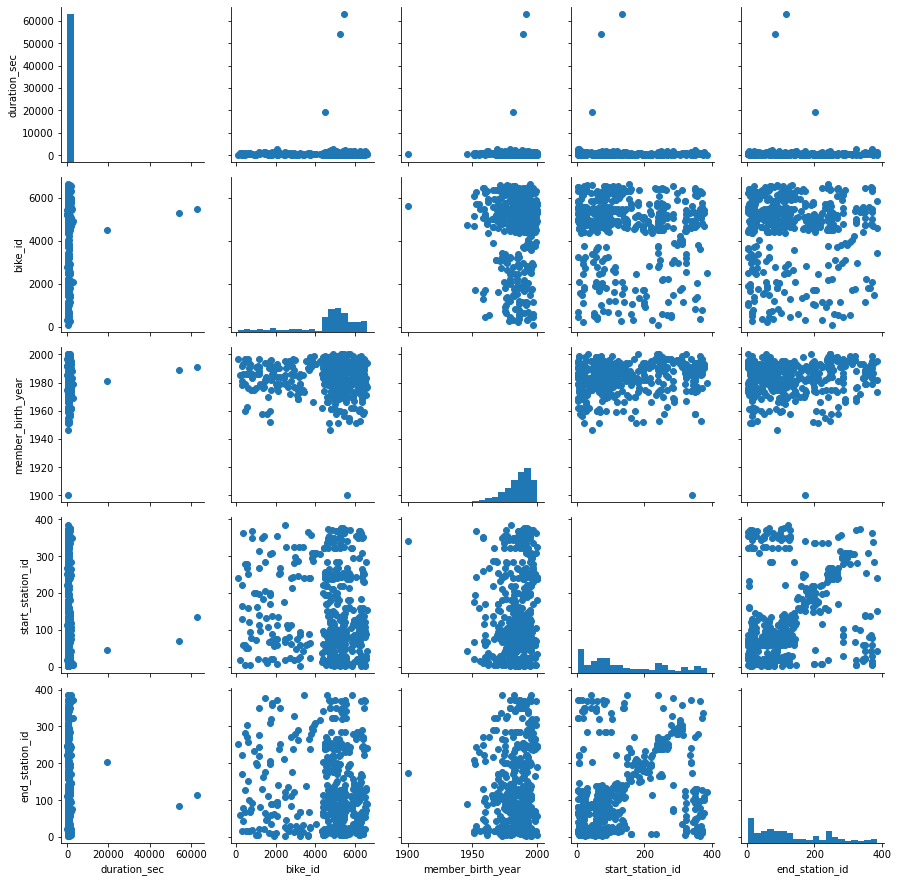

In [151]:
# investigating using scatter 
print("df_bike.shape=",df_bike.shape)
df_bike_sample = df_bike.sample(n=500, replace = False)
print("df_bike_sample.shape=",df_bike_sample.shape)

g = sb.PairGrid(data = df_bike_sample, vars = df_bik_numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

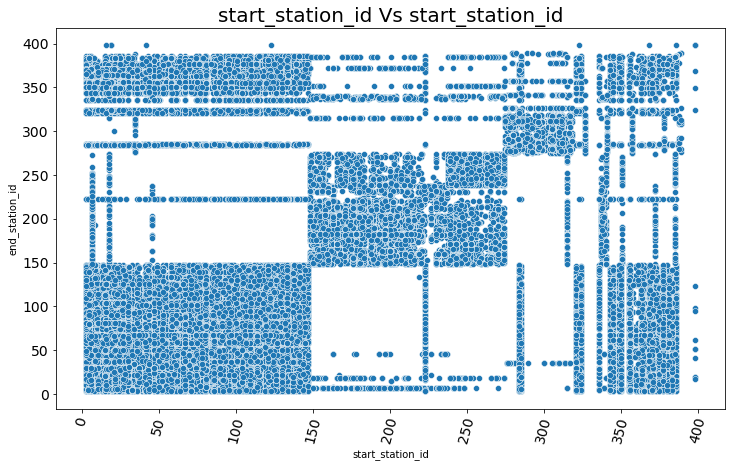

In [152]:
# individual using scatter 
VisualiseDf.plot_scatter(df_bik_numeric,'start_station_id', 'end_station_id', 'start_station_id Vs start_station_id', None, None)

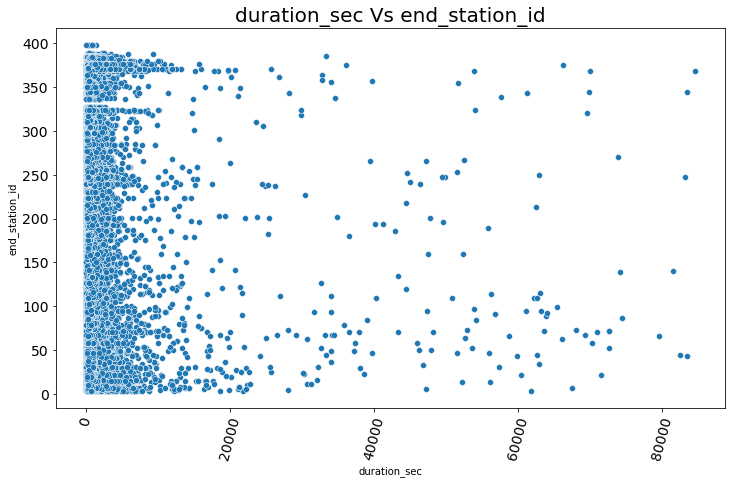

In [153]:
VisualiseDf.plot_scatter(df_bik_numeric,'duration_sec', 'end_station_id', 'duration_sec Vs end_station_id', None, None)

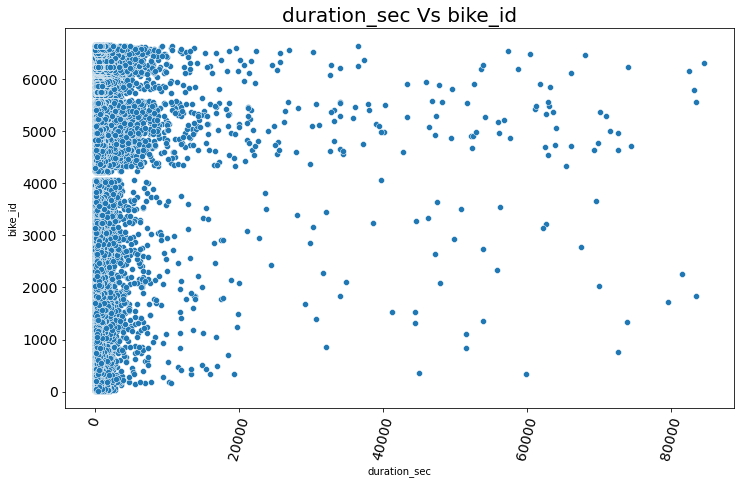

In [159]:
VisualiseDf.plot_scatter(df_bik_numeric,'duration_sec', 'bike_id', 'duration_sec Vs bike_id', None, None)

As it is tried to investiget using the correlation the dimensions are not having strong relationship amonf them. most of the varibles are showing negative relationship from the above scatter plot.

<Figure size 1440x720 with 0 Axes>

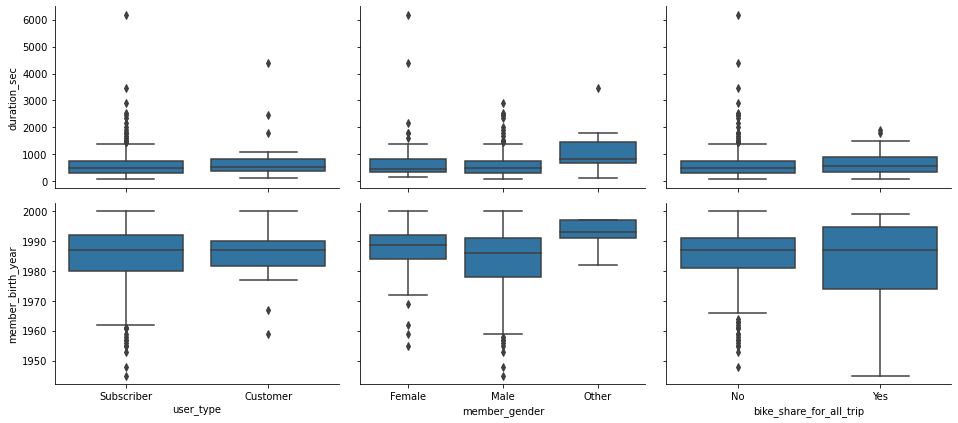

In [164]:
# checking the catagorical variable 
# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]
df_cat =df_bike[['user_type','member_gender', 'bike_share_for_all_trip']]

df_bike_sample1 = df_bike.sample(n=300, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = df_bike_sample1, y_vars = ['duration_sec', 'member_birth_year'], x_vars = df_cat,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

The above box plot shows bantch of outliers and some skewnesses towards left in which most of the values are lying below the median. 
- the duration and user type have good relationship with some outliers lying above the maximum value.
- the female catagory from the member gender have better reltionship with the member birth year with few values lying below the minimum point called outliers.
- the male from the member gender is skeweed to wards left with regard to the birth year. it indicates most of the male users are born before 1990. it also shows outliers in which some peoples who are born before 1970 are subscriber user type.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

